In [ ]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Thesis/TON_IoT/Train_Test_Network.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_df.head()

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_query,dns_qclass,dns_qtype,dns_rcode,dns_AA,dns_RD,dns_RA,dns_rejected,ssl_version,ssl_cipher,ssl_resumed,ssl_established,ssl_subject,ssl_issuer,http_trans_depth,http_method,http_uri,http_version,http_request_body_len,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,1554198358,3.122.49.24,1883,192.168.1.152,52976,tcp,-,80549.530260,1762852,41933215,OTH,0,252181,14911156,2,236,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
1,1554198358,192.168.1.79,47260,192.168.1.255,15600,udp,-,0.000000,0,0,S0,0,1,63,0,0,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,-,-,-,0,normal
2,1554198359,192.168.1.152,1880,192.168.1.152,51782,tcp,-,0.000000,0,0,OTH,0,0,0,0,0,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
3,1554198359,192.168.1.152,34296,192.168.1.152,10502,tcp,-,0.000000,0,0,OTH,0,0,0,0,0,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,-,-,-,0,normal
4,1554198362,192.168.1.152,46608,192.168.1.190,53,udp,dns,0.000549,0,298,SHR,0,0,0,2,354,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,bad_UDP_checksum,-,F,0,normal


In [ ]:
train_df.shape

(461043, 45)

In [ ]:
print(round((train_df.isnull().sum()*100/ len(train_df)),2).sort_values(ascending=False))

type                      0.0
dns_RD                    0.0
dns_rcode                 0.0
dns_qtype                 0.0
dns_qclass                0.0
dns_query                 0.0
dst_ip_bytes              0.0
dst_pkts                  0.0
src_ip_bytes              0.0
src_pkts                  0.0
missed_bytes              0.0
conn_state                0.0
dst_bytes                 0.0
src_bytes                 0.0
duration                  0.0
service                   0.0
proto                     0.0
dst_port                  0.0
dst_ip                    0.0
src_port                  0.0
src_ip                    0.0
dns_AA                    0.0
dns_RA                    0.0
label                     0.0
dns_rejected              0.0
weird_notice              0.0
weird_addl                0.0
weird_name                0.0
http_resp_mime_types      0.0
http_orig_mime_types      0.0
http_user_agent           0.0
http_status_code          0.0
http_response_body_len    0.0
http_reque

**Removing the duplicates records**

In [ ]:
train_df = train_df.drop_duplicates() 

In [ ]:
train_df.reset_index(drop=True, inplace=True)

In [ ]:
train_df.shape

(449972, 45)

In [ ]:
train_df['type'].unique()

array(['normal', 'scanning', 'dos', 'injection', 'ddos', 'password',
       'xss', 'ransomware', 'backdoor', 'mitm'], dtype=object)

Class as pie chart:


Text(0.5, 0, '')

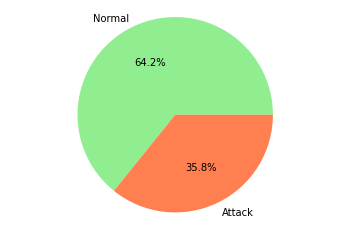

In [ ]:
print("Class as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(train_df.label.value_counts(),autopct='%1.1f%%', labels=['Normal','Attack'], colors=['lightgreen','coral'])
plt.axis('equal')
plt.xlabel('')

In [ ]:
attack_class_train = train_df[['type']].apply(lambda x:x.value_counts())
attack_class_train['attack_freq_train'] = round((100 * attack_class_train/attack_class_train.sum()),2)

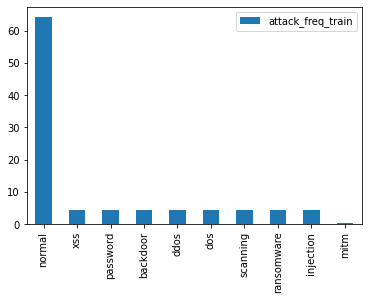

In [ ]:
plot = attack_class_train[['attack_freq_train']].plot(kind="bar")

In [ ]:
colors = ['mistyrose', 'red','yellowgreen', 'lightcoral', 'gold','indigo','orange','grey','cyan','purple']

In [ ]:
labels=['normal','xss','scanning','ransomware','ddos','password','dos','backdoor','injection','mitm']

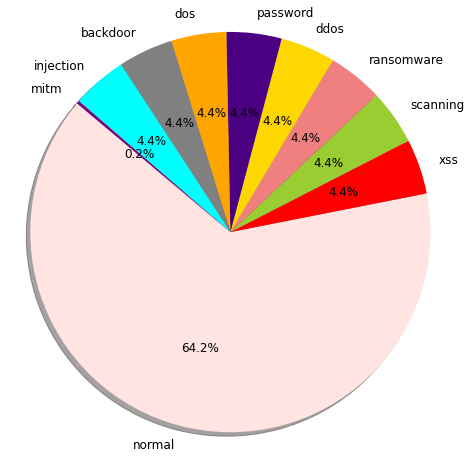

In [ ]:
# Plot the different attack class types
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(8,8))
plt.pie(train_df.type.value_counts(), labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

**Dropping Src and destination IP**

In [ ]:
train_df = train_df.drop(['src_ip'], axis = 1)

In [ ]:
train_df = train_df.drop(['dst_ip'], axis = 1)

Dropping TimeStamp and dns query (Domain name subject of the query)

In [ ]:
train_df = train_df.drop(['ts','dns_query'], axis = 1)

In [ ]:
cols_category = train_df.select_dtypes('object').columns 
cols_numeric = train_df._get_numeric_data().columns
print(cols_category)
print(cols_numeric)

Index(['proto', 'service', 'conn_state', 'dns_AA', 'dns_RD', 'dns_RA',
       'dns_rejected', 'ssl_version', 'ssl_cipher', 'ssl_resumed',
       'ssl_established', 'ssl_subject', 'ssl_issuer', 'http_trans_depth',
       'http_method', 'http_uri', 'http_version', 'http_user_agent',
       'http_orig_mime_types', 'http_resp_mime_types', 'weird_name',
       'weird_addl', 'weird_notice', 'type'],
      dtype='object')
Index(['src_port', 'dst_port', 'duration', 'src_bytes', 'dst_bytes',
       'missed_bytes', 'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes',
       'dns_qclass', 'dns_qtype', 'dns_rcode', 'http_request_body_len',
       'http_response_body_len', 'http_status_code', 'label'],
      dtype='object')


In [ ]:
train_df.ssl_cipher.unique()

array(['-', 'TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256',
       'TLS_AES_128_GCM_SHA256',
       'TLS_ECDHE_ECDSA_WITH_AES_128_GCM_SHA256',
       'TLS_ECDHE_RSA_WITH_AES_256_GCM_SHA384',
       'TLS_ECDHE_RSA_WITH_AES_256_CBC_SHA'], dtype=object)

In [ ]:
train_df.ssl_cipher.value_counts()

-                                          449666
TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256         176
TLS_AES_128_GCM_SHA256                        116
TLS_ECDHE_RSA_WITH_AES_256_GCM_SHA384          11
TLS_ECDHE_RSA_WITH_AES_256_CBC_SHA              2
TLS_ECDHE_ECDSA_WITH_AES_128_GCM_SHA256         1
Name: ssl_cipher, dtype: int64

In [ ]:
train_df= train_df.replace({'http_trans_depth':'-'}, 0)

In [ ]:
train_df= train_df.replace({'weird_addl':'-'}, 0)

In [ ]:
train_df['weird_addl'] = train_df['weird_addl'].astype('int64')

In [ ]:
 train_df['http_trans_depth'] = train_df['http_trans_depth'].astype('int64')

 Getting the list of non num features 

In [ ]:
ls_strings =[]
for column in list(train_df.columns):
     if train_df[column].dtypes == 'O':
            ls_strings.append(column)

In [ ]:
print(ls_strings)

['proto', 'service', 'conn_state', 'dns_AA', 'dns_RD', 'dns_RA', 'dns_rejected', 'ssl_version', 'ssl_cipher', 'ssl_resumed', 'ssl_established', 'ssl_subject', 'ssl_issuer', 'http_method', 'http_uri', 'http_version', 'http_user_agent', 'http_orig_mime_types', 'http_resp_mime_types', 'weird_name', 'weird_notice', 'type']


In [ ]:
print(len(ls_strings))

22


In [ ]:
i=0
while i<len(ls_strings):
      j=0
      uniq = train_df[ls_strings[i]].unique()
      while j<len(uniq):
                train_df = train_df.replace({ls_strings[i] : uniq[j]}, j)
                j+=1
      i+=1

In [ ]:
train_df.head()

,src_port,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_qclass,dns_qtype,dns_rcode,dns_AA,dns_RD,dns_RA,dns_rejected,ssl_version,ssl_cipher,ssl_resumed,ssl_established,ssl_subject,ssl_issuer,http_trans_depth,http_method,http_uri,http_version,http_request_body_len,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,1883,52976,0,0,80549.530260,1762852,41933215,0,0,252181,14911156,2,236,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,47260,15600,1,0,0.000000,0,0,1,0,1,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,1880,51782,0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,34296,10502,0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,46608,53,1,1,0.000549,0,298,2,0,0,0,2,354,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0


    #    Making all entries astype(float)

In [ ]:
for i in list(train_df):
        train_df[i] = train_df[i].astype(float)
  

In [ ]:
y_cat = np.array(train_df['type'])
y_lbl = np.array(train_df['label'])
train_df = train_df.drop(columns = ['type','label'])

In [ ]:
train_df.head()

,src_port,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_qclass,dns_qtype,dns_rcode,dns_AA,dns_RD,dns_RA,dns_rejected,ssl_version,ssl_cipher,ssl_resumed,ssl_established,ssl_subject,ssl_issuer,http_trans_depth,http_method,http_uri,http_version,http_request_body_len,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice
0,1883.0,52976.0,0.0,0.0,80549.530260,1762852.0,41933215.0,0.0,0.0,252181.0,14911156.0,2.0,236.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,47260.0,15600.0,1.0,0.0,0.000000,0.0,0.0,1.0,0.0,1.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1880.0,51782.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,34296.0,10502.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,46608.0,53.0,1.0,1.0,0.000549,0.0,298.0,2.0,0.0,0.0,0.0,2.0,354.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


In [ ]:
train_df.head()

,src_port,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_qclass,dns_qtype,dns_rcode,dns_AA,dns_RD,dns_RA,dns_rejected,ssl_version,ssl_cipher,ssl_resumed,ssl_established,ssl_subject,ssl_issuer,http_trans_depth,http_method,http_uri,http_version,http_request_body_len,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice
0,1883.0,52976.0,0.0,0.0,80549.530260,1762852.0,41933215.0,0.0,0.0,252181.0,14911156.0,2.0,236.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,47260.0,15600.0,1.0,0.0,0.000000,0.0,0.0,1.0,0.0,1.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1880.0,51782.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,34296.0,10502.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,46608.0,53.0,1.0,1.0,0.000549,0.0,298.0,2.0,0.0,0.0,0.0,2.0,354.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
list_features = list(train_df.columns)
print(list_features)

['src_port', 'dst_port', 'proto', 'service', 'duration', 'src_bytes', 'dst_bytes', 'conn_state', 'missed_bytes', 'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes', 'dns_qclass', 'dns_qtype', 'dns_rcode', 'dns_AA', 'dns_RD', 'dns_RA', 'dns_rejected', 'ssl_version', 'ssl_cipher', 'ssl_resumed', 'ssl_established', 'ssl_subject', 'ssl_issuer', 'http_trans_depth', 'http_method', 'http_uri', 'http_version', 'http_request_body_len', 'http_response_body_len', 'http_status_code', 'http_user_agent', 'http_orig_mime_types', 'http_resp_mime_types', 'weird_name', 'weird_addl', 'weird_notice']


In [ ]:
print(len(list_features))

39


In [ ]:
train_df[list_features] = scaler.fit_transform(train_df[list_features])                    
train_df.head()

,src_port,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_qclass,dns_qtype,dns_rcode,dns_AA,dns_RD,dns_RA,dns_rejected,ssl_version,ssl_cipher,ssl_resumed,ssl_established,ssl_subject,ssl_issuer,http_trans_depth,http_method,http_uri,http_version,http_request_body_len,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice
0,0.028718,0.808424,0.0,0.000000,8.613363e-01,0.000453,1.071405e-02,0.000000,0.0,1.000000,0.314799,0.000006,0.000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.721148,0.238059,0.5,0.000000,0.000000e+00,0.000000,0.000000e+00,0.083333,0.0,0.000004,0.000001,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,1.0
2,0.028673,0.790203,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.523324,0.160262,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,1.0
4,0.711199,0.000809,0.5,0.111111,5.870595e-09,0.000000,7.613979e-08,0.166667,0.0,0.000000,0.000000,0.000006,0.000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,0.0


Boolean Values became categorical values

In [ ]:
train_df.dns_AA.value_counts()

0.0    354668
0.5     80698
1.0     14606
Name: dns_AA, dtype: int64

In [ ]:
train_df.dns_RD.value_counts()

0.0    354668
0.5     62526
1.0     32778
Name: dns_RD, dtype: int64

In [ ]:
X = train_df.to_numpy()

In [ ]:
binary_class = True

In [ ]:
if binary_class:
        Y=y_lbl
else:
        Y=y_cat

In [ ]:
test_percentage =10

In [ ]:
vald_percentage =10

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X,Xtest,Y,Ytest = train_test_split(X,Y, stratify=Y,test_size=(test_percentage/100))
Xtrain,Xvalid,Ytrain,Yvalid = train_test_split(X,Y, stratify=Y,test_size=(vald_percentage/100))

In [ ]:
print(Xtrain.shape)

(364476, 39)


# Fitting the classifier into the Training set

Random Forest

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
selector = SelectFromModel(estimator=LogisticRegression()).fit(X, Y)
selector.fit(X,Y)
X_train_fs_l = selector.transform(X)
X_test_fs_1 = selector.transform(Xtest)
model = LogisticRegression(random_state=0,solver='saga',multi_class='auto')
model.fit(X_train_fs_l, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
yhat = model.predict(X_test_fs_1)
# evaluate predictions
accuracy = accuracy_score(Ytest, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 83.80


In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
sel = SelectFromModel(model)
sel.fit(Xtrain,Ytrain)


SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='entropy',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=200, n_jobs=None,
                                                 oob_score=Fal

In [ ]:
selected_feat= train_df.columns[(sel.get_support())]
len(selected_feat)

11

In [ ]:
print(selected_feat)

Index(['src_port', 'dst_port', 'proto', 'service', 'conn_state', 'src_pkts',
       'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes', 'dns_RD', 'dns_rejected'],
      dtype='object')


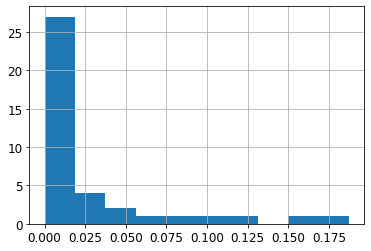

In [ ]:
pd.Series(sel.estimator_.feature_importances_.ravel()).hist()

In [ ]:
importances = sel.estimator_.feature_importances_

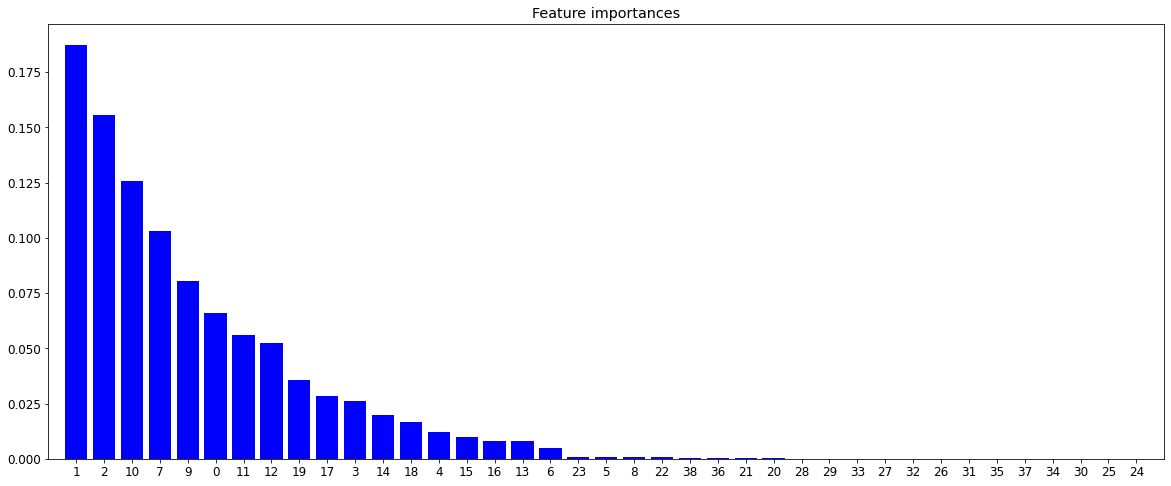

In [ ]:
importances = sel.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
# X is the train data used to fit the model 
plt.figure(figsize=(20,8)) 
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="b", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
print(train_df.columns)

Index(['src_port', 'dst_port', 'proto', 'service', 'duration', 'src_bytes',
       'dst_bytes', 'conn_state', 'missed_bytes', 'src_pkts', 'src_ip_bytes',
       'dst_pkts', 'dst_ip_bytes', 'dns_qclass', 'dns_qtype', 'dns_rcode',
       'dns_AA', 'dns_RD', 'dns_RA', 'dns_rejected', 'ssl_version',
       'ssl_cipher', 'ssl_resumed', 'ssl_established', 'ssl_subject',
       'ssl_issuer', 'http_trans_depth', 'http_method', 'http_uri',
       'http_version', 'http_request_body_len', 'http_response_body_len',
       'http_status_code', 'http_user_agent', 'http_orig_mime_types',
       'http_resp_mime_types', 'weird_name', 'weird_addl', 'weird_notice'],
      dtype='object')


Feature: 0, Score: 0.06587
Feature: 1, Score: 0.18740
Feature: 2, Score: 0.15540
Feature: 3, Score: 0.02606
Feature: 4, Score: 0.01210
Feature: 5, Score: 0.00082
Feature: 6, Score: 0.00492
Feature: 7, Score: 0.10300
Feature: 8, Score: 0.00073
Feature: 9, Score: 0.08039
Feature: 10, Score: 0.12560
Feature: 11, Score: 0.05596
Feature: 12, Score: 0.05241
Feature: 13, Score: 0.00783
Feature: 14, Score: 0.02004
Feature: 15, Score: 0.00989
Feature: 16, Score: 0.00785
Feature: 17, Score: 0.02831
Feature: 18, Score: 0.01645
Feature: 19, Score: 0.03545
Feature: 20, Score: 0.00014
Feature: 21, Score: 0.00019
Feature: 22, Score: 0.00071
Feature: 23, Score: 0.00087
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00009
Feature: 27, Score: 0.00010
Feature: 28, Score: 0.00013
Feature: 29, Score: 0.00012
Feature: 30, Score: 0.00001
Feature: 31, Score: 0.00008
Feature: 32, Score: 0.00010
Feature: 33, Score: 0.00012
Feature: 34, Score: 0.00001
Feature: 35, Score: 0.00004
Fe

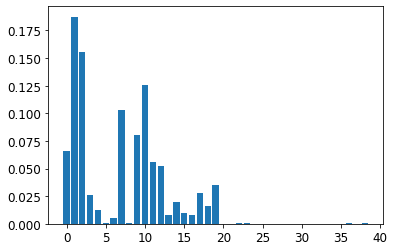

In [ ]:
for i,v in enumerate(importances):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()

In [ ]:
X_train_fs = sel.transform(Xtrain)

In [ ]:
X_test_fs = sel.transform(Xtest)

# fit the model LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#model = LogisticRegression(solver='liblinear')
model = LogisticRegression(random_state=0,solver='saga',multi_class='auto')
model.fit(X_train_fs, Ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# evaluate the model
from sklearn.metrics import accuracy_score
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(Ytest, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 83.79


XGBoost

In [ ]:
from xgboost import XGBClassifier
xgbmodel = XGBClassifier()

In [ ]:
# fit the model
xgbmodel.fit(Xtrain,Ytrain)
# get importance
importance = xgbmodel.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance


Feature: 0, Score: 0.00478
Feature: 1, Score: 0.06066
Feature: 2, Score: 0.17260
Feature: 3, Score: 0.07340
Feature: 4, Score: 0.01847
Feature: 5, Score: 0.03285
Feature: 6, Score: 0.00785
Feature: 7, Score: 0.21260
Feature: 8, Score: 0.00309
Feature: 9, Score: 0.03469
Feature: 10, Score: 0.06280
Feature: 11, Score: 0.05316
Feature: 12, Score: 0.03234
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.01031
Feature: 15, Score: 0.00359
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.04572
Feature: 18, Score: 0.04325
Feature: 19, Score: 0.11422
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00640
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00180
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00039
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00393
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00108
Fe

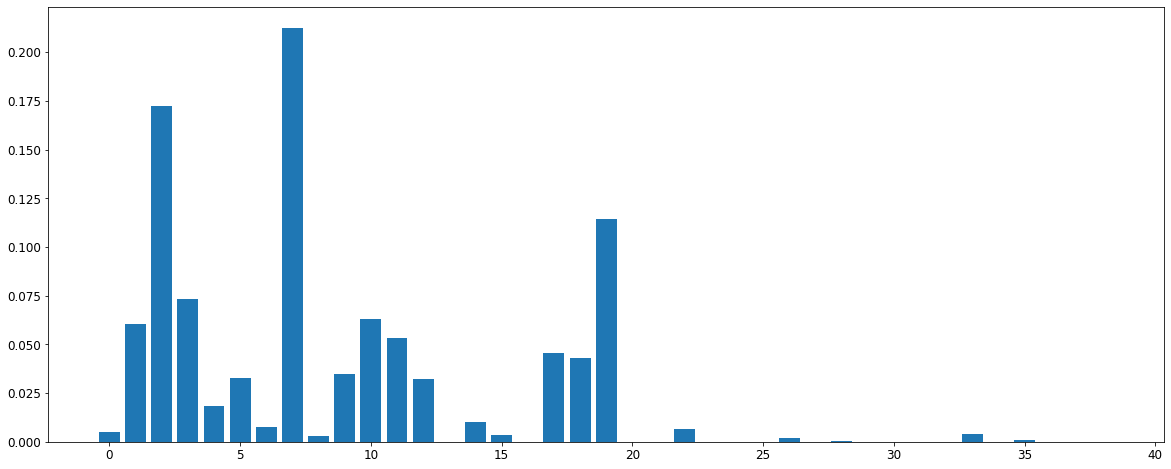

In [ ]:
plt.figure(figsize=(20,8)) 
plt.bar([x for x in range(len(importance))], importance)
plt.show()